# Confirmed Cases plot for different countries

Confirmed cases of a country are based on the dataset provided by JHU, Confirmed. These countries are affected of SARS Covid-19 (aka Coronavirus) outbreak. The dataset consist of countries, wherein cases are indexed datewise.

This script fetches the online datasets and parses through them for the required countries and plot them in line-plots format.<br>
The plot in the end shows cumulative Confirmed Cases of some countries (more countries can be added and subtracted from that list) based on days since they reached 100. Last day confirmed case data of each country is also printed.

Simple Formula to explain what confirm cases mean:<br>
Confirmed case = Active + Recovered + Deaths 
   
Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

### Import and Load Datasets
#### Confirmed Global
In link provided above one can see various datasets in form of comma separated files(csv), we will import Confirmed cases of Covid-19:
 *'time_series_covid19_confirmed_global.csv'*

In [2]:
Confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Confirmed_cases.iloc[0:5,:] # Printing data explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


### Setting Duration with Terminal Dates
The global datasets have their starting date from index = 4, and the date is 22nd January 2020

In [3]:
# Storing Start and End Date in string format of 'DD M YYYY' (Here M is whole month)

BeginDate = datetime.strptime(Confirmed_cases.columns[4],'%m/%d/%y').strftime("%d %B %Y")
EndDate = datetime.strptime(Confirmed_cases.columns[-1],'%m/%d/%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

22 January 2020
17 May 2020


### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data.

#### FetchConfirmedData Function

*Params*: Country Name 

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [4]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchConfirmedData(CountryName):
    
    Dataset = Confirmed_cases
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
        
    return CountryRow

# --- Function Ends Here ---

### Function to plot Confirmed cases data

*Params*: List of countries

*Returns*: None

Function plots the cumulative confirmed cases of different countries passed as parameter against the no. of days since that particular country got its 100 cases.<br> 
x-axis = No. of days <br>
y-axis = No. of confirmed cases <br>
Graph also shows the last day value of the cumulative confirmed cases with each country

In [5]:
def PlotDaywiseCC(loc):
    
    noc = len(loc)
    CountriesCCdata = []
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    numDays = Dateslist.shape[0]
    Days = [i for i in range(numDays)]
        
    fig1, ax1 = plt.subplots(figsize = (15,12))
    
    palette = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'lime']
    
    pindex = 0
    
    for i in range(noc):
        
        CountryCCdata = FetchConfirmedData(loc[i])
        
        for j in range(len(CountryCCdata)):
            if CountryCCdata[j] >= 100:
                threshold = j
                break
        
        # Create a new list for country with 100+ cases and filling the rest values in the list with NaN values 
        CountryCCdataAbove100 = CountryCCdata[threshold:len(CountryCCdata)]
        lastday = len(CountryCCdataAbove100)
        for k in range(lastday, numDays):
            CountryCCdataAbove100.append(np.nan)
        
        # Plotting the lines and markers
        if pindex == 12:
            pindex = 0
        ax1.plot(Days, CountryCCdataAbove100, color = palette[pindex], linestyle='-', linewidth = 1, 
             marker='o', markerfacecolor=palette[pindex], markersize=3)
                       
        ax1.plot(Days[lastday-1], CountryCCdataAbove100[lastday-1], color=palette[pindex], 
             marker='o', markerfacecolor=palette[pindex], markersize=8)
                       
        Boxtext = str(loc[i] + ' :  ' + str(CountryCCdataAbove100[lastday-1]))
        ax1.text(Days[lastday-1] + Days[lastday-1] - Days[lastday-2], CountryCCdataAbove100[lastday-1], Boxtext, color='black', 
                 fontsize = 10, bbox=dict(facecolor='white', edgecolor=palette[pindex], boxstyle='round'))
        
        pindex = pindex+1
    
    # Formatting the plot
    
    ax1.set_yscale('log')
    
    ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    
    ax1.set_yticks([100, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000])
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    ax1.get_yaxis().set_tick_params(which='minor', size=0)
    ax1.get_yaxis().set_tick_params(which='minor', width=0)
    
    ax1.grid(axis = 'y')
    
    ax1.set_xlabel('Days since 100 cases', fontsize = 13)
    ax1.set_ylabel('Number of Cases (Log scaling)', fontsize = 13)
    
    ax1.set_title('Covid-19 Confirmed Cases in India and other countries as of ' + EndDate, fontsize = 15)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.savefig('Countries_ConfirmedCases.png')
    
    # --- Function Ends Here ---

List of countries has been made to pass in the function for plotting. One can add more countries to it (or reduce).<br>

In [6]:
list_of_countries = ['India', 'Indonesia', 'United Kingdom', 'Japan', 'Korea, South', 'Iran', 'Australia', 'US', 'Russia']

### Finally the Plot

The plot is preceded by dataframe of the countries passed. Also check image of the plot, saved in your system.

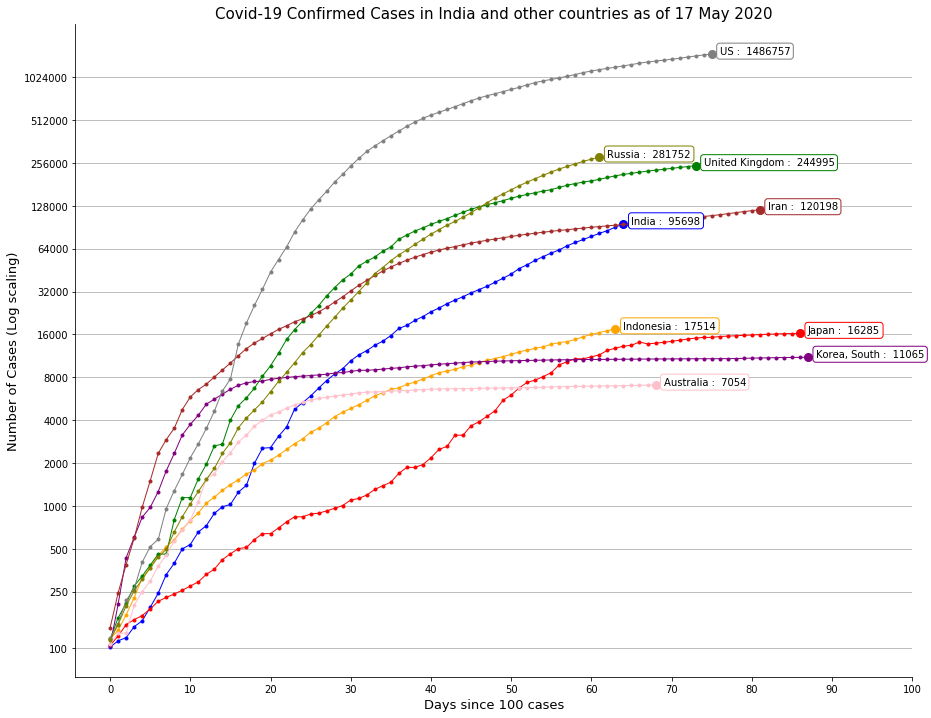

In [7]:
PlotDaywiseCC(list_of_countries)